<img src="https://i.imgur.com/6U6q5jQ.png"/>

<a target="_blank" href="https://colab.research.google.com/github/SocialAnalytics-StrategicIntelligence/introTextData/blob/main/index.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Text as Data

Let me get use some old tweets from Donald Trump:

In [1]:
import pandas as pd
import os

trumpFile = r"C:\Users\PC\OneDrive - Softkey Digital\Aldo Mendoza Cotera\2024-1\Herramientas cuantitativas\Tarea 4\trumps.csv"
allTweets = pd.read_csv(trumpFile)
allTweets

,created_at,text,is_retweet,favorite_count,retweet_count,Hour,Day,Date
0,2020-08-13 23:26:50,.@DonYoungAK really produces for Alaska. He is...,False,18714,5305,23,5,2020-08-13
1,2020-08-13 23:23:26,"...She will be a great Senator, and has my Com...",False,14946,3490,23,5,2020-08-13
2,2020-08-13 23:23:25,.@CynthiaMLummis is a friend of mine and a gre...,False,32586,8584,23,5,2020-08-13
3,2020-08-13 21:27:36,LIVE: President @realDonaldTrump holds a news ...,True,0,5917,21,5,2020-08-13
4,2020-08-13 18:59:29,https://t.co/ymvtIzQqoR,False,20131,5303,18,5,2020-08-13
...,...,...,...,...,...,...,...,...
194,2020-08-04 23:00:40,Reopening Our Schools: @realDonaldTrump says s...,True,0,7205,23,3,2020-08-04
195,2020-08-04 23:00:38,Reopening America: President @realDonaldTrump ...,True,0,7603,23,3,2020-08-04
196,2020-08-04 23:00:15,We have far and away the most robust testing c...,True,0,5717,23,3,2020-08-04
197,2020-08-04 22:48:35,"""As we shelter those at high risk, we are also...",True,0,5414,22,3,2020-08-04


Let me subset the dataframe, just to keep the non retweets:

In [2]:
DTtweets=allTweets[~allTweets.is_retweet]
DTtweets.reset_index(drop=True,inplace=True)

## Tokenization

A key step for text analytics is tokenization: where the text is broken into smaller pieces.

We can use:

- NLTK library:

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import nltk
from nltk.tokenize import word_tokenize

DTtweets['text'].apply(nltk.word_tokenize)

0      [., @, DonYoungAK, really, produces, for, Alas...
1      [..., She, will, be, a, great, Senator, ,, and...
2      [., @, CynthiaMLummis, is, a, friend, of, mine...
3                          [https, :, //t.co/ymvtIzQqoR]
4                          [https, :, //t.co/BY6PrMRmqJ]
                             ...                        
116    [For, those, that, thought, I, wasn, ’, t, int...
117    [A, great, race, run, by, Roger, against, a, v...
118    [There, is, TREMENDOUS, Lawlessness, in, Ameri...
119                        [https, :, //t.co/JDS4zUXXJG]
120    [Great, meeting, today, with, the, CoronaVirus...
Name: text, Length: 121, dtype: object

* Pandas string functions:

In [5]:
DTtweets.text.str.split('\s')

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\PC\AppData\Local\Temp\ipykernel_2316\3649700940.py:1: SyntaxWarning: invalid escape sequence '\s'
  DTtweets.text.str.split('\s')


0      [.@DonYoungAK, really, produces, for, Alaska.,...
1      [...She, will, be, a, great, Senator,, and, ha...
2      [.@CynthiaMLummis, is, a, friend, of, mine, an...
3                              [https://t.co/ymvtIzQqoR]
4                              [https://t.co/BY6PrMRmqJ]
                             ...                        
116    [For, those, that, thought, I, wasn’t, into, t...
117    [A, great, race, run, by, Roger, against, a, v...
118    [There, is, TREMENDOUS, Lawlessness, in, Ameri...
119                            [https://t.co/JDS4zUXXJG]
120    [Great, meeting, today, with, the, CoronaVirus...
Name: text, Length: 121, dtype: object

The basic Pandas seems more convenient. Then, we simply create a series where each cell is a token (word):

In [6]:
import numpy as np

wordInSeries=pd.Series(np.concatenate(DTtweets.text.str.split('\s')))
wordInSeries

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\PC\AppData\Local\Temp\ipykernel_2316\3515399346.py:3: SyntaxWarning: invalid escape sequence '\s'
  wordInSeries=pd.Series(np.concatenate(DTtweets.text.str.split('\s')))


0                   .@DonYoungAK
1                         really
2                       produces
3                            for
4                        Alaska.
                  ...           
2915                        Stay
2916                    informed
2917                         at:
2918    https://t.co/p9j7kZsD7b.
2919     https://t.co/nnnUHCzOLV
Length: 2920, dtype: object

### Cleaning the tokens

In [7]:
wordInSeries=wordInSeries[~wordInSeries.str.startswith('http')].reset_index(drop=True)
wordInSeries

0       .@DonYoungAK
1             really
2           produces
3                for
4            Alaska.
            ...     
2861            Oval
2862         Office.
2863            Stay
2864        informed
2865             at:
Length: 2866, dtype: object

In [8]:
wordInSeries=wordInSeries.str.replace('[^\x01-\x7F]','')
wordInSeries=wordInSeries.str.replace('&amp;','and')
wordInSeries=wordInSeries.str.replace('&lt;|&gt;','')
wordInSeries

0       .@DonYoungAK
1             really
2           produces
3                for
4            Alaska.
            ...     
2861            Oval
2862         Office.
2863            Stay
2864        informed
2865             at:
Length: 2866, dtype: object

In [9]:
# punctuation
import string
PUNCs=string.punctuation # '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
wordInSeries=wordInSeries.str.replace('['+PUNCs+']', '',regex=True)

# all to lower case
wordInSeries=wordInSeries.str.lower()
wordInSeries

0       donyoungak
1           really
2         produces
3              for
4           alaska
           ...    
2861          oval
2862        office
2863          stay
2864      informed
2865            at
Length: 2866, dtype: object

### Relevant tokens

It is difficult to know what tokens should not be analyzed. Let's count the current ones:

In [10]:
wordInSeries.value_counts()

the           136
and            91
to             79
in             67
of             58
             ... 
plague          1
cops            1
sleazebags      1
highest         1
informed        1
Name: count, Length: 1027, dtype: int64

We could agree that simple sintactic components like determinatives, conjunctions, or prepositions do carry much information. Most of these elements are known as **STOPWORDS**.  We use them to reduce our tokens:

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords
STOPS = stopwords.words('english')


wordInSeries=wordInSeries[~wordInSeries.isin(STOPS)].reset_index(drop=True)
wordInSeries

0       donyoungak
1           really
2         produces
3           alaska
4       incredible
           ...    
1681         force
1682          oval
1683        office
1684          stay
1685      informed
Length: 1686, dtype: object

## Word Frequency

We could keep prepare a frequency with the words remaining:

In [13]:
wordInSeries.value_counts()

great       27
bus         20
people      18
usdot       17
big         15
            ..
men          1
women        1
fighting     1
plague       1
informed     1
Name: count, Length: 927, dtype: int64

Let's see the distribution of counts:

<Axes: ylabel='Frequency'>

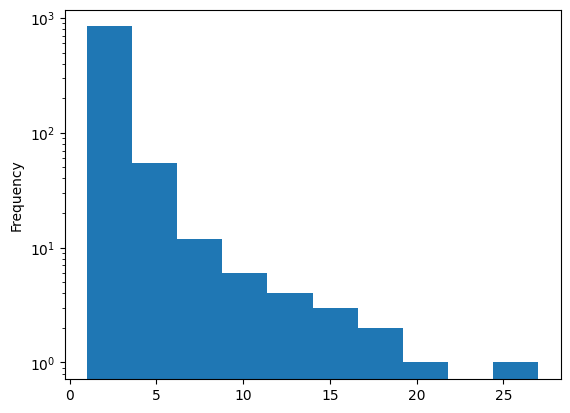

In [14]:
wordInSeries.value_counts().plot(logy=True, kind='hist')

In [15]:
FrequencyTrumpTokens=wordInSeries.value_counts()[wordInSeries.value_counts()>5]
FrequencyTrumpTokens

great              27
bus                20
people             18
usdot              17
big                15
service            14
infrastructure     14
support            13
state              12
complete           12
news               12
federal            11
endorsement        11
total              10
funds              10
joe                10
congratulations     9
                    8
biden               8
thank               8
improvements        8
happy               7
president           7
fake                7
good                7
new                 7
states              7
second              7
first               7
way                 6
vets                6
funding             6
would               6
amendment           6
one                 6
win                 6
strong              6
congressman         6
Name: count, dtype: int64

We have series, let me have a dict:

In [16]:
FrequencyTrumpTokens.to_dict()

{'great': 27,
 'bus': 20,
 'people': 18,
 'usdot': 17,
 'big': 15,
 'service': 14,
 'infrastructure': 14,
 'support': 13,
 'state': 12,
 'complete': 12,
 'news': 12,
 'federal': 11,
 'endorsement': 11,
 'total': 10,
 'funds': 10,
 'joe': 10,
 'congratulations': 9,
 '': 8,
 'biden': 8,
 'thank': 8,
 'improvements': 8,
 'happy': 7,
 'president': 7,
 'fake': 7,
 'good': 7,
 'new': 7,
 'states': 7,
 'second': 7,
 'first': 7,
 'way': 6,
 'vets': 6,
 'funding': 6,
 'would': 6,
 'amendment': 6,
 'one': 6,
 'win': 6,
 'strong': 6,
 'congressman': 6}

### Plotting

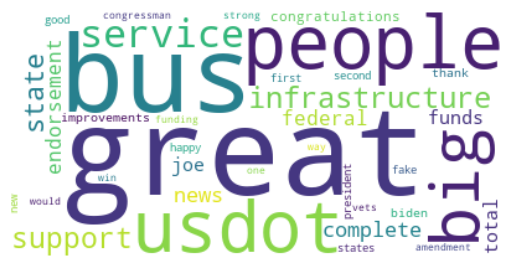

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc1 = WordCloud(background_color='white')
wc1.generate_from_frequencies(frequencies=FrequencyTrumpTokens.to_dict())
plt.figure()
plt.imshow(wc1, interpolation="bilinear")
plt.axis("off")
plt.show()

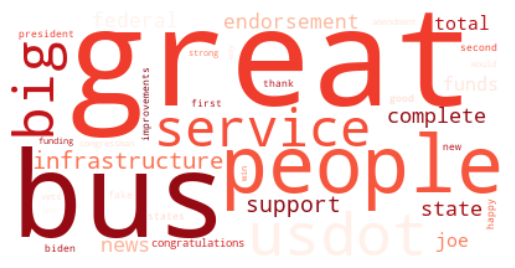

In [18]:
wc2 = WordCloud(background_color='white',
                colormap="Reds")
wc2.generate_from_frequencies(frequencies=FrequencyTrumpTokens.to_dict())
plt.figure()
plt.imshow(wc2, interpolation="bilinear")
plt.axis("off")
plt.show()

## Bigrams

We can do the same with pairs of words (bigrams). Let me open a text file:

In [19]:
f = open("C:/Users/PC/OneDrive - Softkey Digital/Aldo Mendoza Cotera/2024-1/Herramientas cuantitativas/Tarea 4/sometext.txt", "r")


textFile = r"C:\Users\PC\OneDrive - Softkey Digital\Aldo Mendoza Cotera\2024-1\Herramientas cuantitativas\Tarea 4\sometext.txt"
allText=pd.read_table(textFile,header=None)

#see the text
allText

,0
0,Seattle is under siege. Over the past five yea...
1,"At the same time, according to the Puget Sound..."
2,"Over the past year, I’ve spent time at city co..."
3,Seattle has long been known as one of America’...
4,"On the surface, this argument has its own inte..."
5,"Even in a pricey city like Seattle, most worki..."
6,Using homelessness as a symbol of “capitalism’...
7,"What the socialists won’t, or can’t, see is th..."
8,The stubborn reality is that Seattle is expens...
9,"“What the socialists won’t, or can’t, see is t..."


Let's normalize the text to lowercase:

In [20]:
type(allText)

pandas.core.frame.DataFrame

In [21]:
allText[0]=allText[0].str.lower()
allText[0]=allText[0].str.replace('['+PUNCs+']', '',regex=True)

Let me create the bigrams:

In [22]:
from nltk import bigrams

theBigrams=[bigrams(eachTW.split()) for eachTW in allText[0]]


# list of all bigrams
from itertools import chain

pairWords = list(chain(*theBigrams))

pairWords

[('seattle', 'is'),
 ('is', 'under'),
 ('under', 'siege'),
 ('siege', 'over'),
 ('over', 'the'),
 ('the', 'past'),
 ('past', 'five'),
 ('five', 'years'),
 ('years', 'the'),
 ('the', 'emerald'),
 ('emerald', 'city'),
 ('city', 'has'),
 ('has', 'seen'),
 ('seen', 'an'),
 ('an', 'explosion'),
 ('explosion', 'of'),
 ('of', 'homelessness'),
 ('homelessness', 'crime'),
 ('crime', 'and'),
 ('and', 'addiction'),
 ('addiction', 'in'),
 ('in', 'its'),
 ('its', '2017'),
 ('2017', 'pointintime'),
 ('pointintime', 'count'),
 ('count', 'of'),
 ('of', 'the'),
 ('the', 'homeless'),
 ('homeless', 'king'),
 ('king', 'county'),
 ('county', 'socialservices'),
 ('socialservices', 'agency'),
 ('agency', 'all'),
 ('all', 'home'),
 ('home', 'found'),
 ('found', '11643'),
 ('11643', 'people'),
 ('people', 'sleeping'),
 ('sleeping', 'in'),
 ('in', 'tents'),
 ('tents', 'cars'),
 ('cars', 'and'),
 ('and', 'emergency'),
 ('emergency', 'shelters'),
 ('shelters', 'property'),
 ('property', 'crime'),
 ('crime', 'has'

I will also use the **stopwords** here. I will get rid of any pair of words that include at least one of the **stopwords**:

In [23]:
pairWords_clean = [gram for gram in pairWords if not any(stop in gram for stop in STOPS)]
print(pairWords_clean)

[('past', 'five'), ('five', 'years'), ('emerald', 'city'), ('homelessness', 'crime'), ('2017', 'pointintime'), ('pointintime', 'count'), ('homeless', 'king'), ('king', 'county'), ('county', 'socialservices'), ('socialservices', 'agency'), ('home', 'found'), ('found', '11643'), ('11643', 'people'), ('people', 'sleeping'), ('tents', 'cars'), ('emergency', 'shelters'), ('shelters', 'property'), ('property', 'crime'), ('rate', 'two'), ('half', 'times'), ('times', 'higher'), ('los', 'angeles’s'), ('four', 'times'), ('times', 'higher'), ('new', 'york'), ('york', 'city’s'), ('city’s', 'cleanup'), ('cleanup', 'crews'), ('crews', 'pick'), ('dirty', 'needles'), ('city', 'streets'), ('parks', 'every'), ('every', 'year'), ('time', 'according'), ('puget', 'sound'), ('sound', 'business'), ('business', 'journal'), ('seattle', 'metro'), ('metro', 'area'), ('area', 'spends'), ('1', 'billion'), ('billion', 'fighting'), ('fighting', 'homelessness'), ('homelessness', 'every'), ('every', 'year'), ('year', 

At this stage, let me create a frequency table of the bigrams:

In [24]:
from collections import Counter

bigramsCount_dict = Counter(pairWords_clean) #generate counter

# Turn bigramsCount_dict  into dataframe, naming columns
bigramsCount = pd.DataFrame(bigramsCount_dict.most_common(),
                        columns=['theBigram', 'weight'])
bigramsCount

,theBigram,weight
0,"(king, county)",8
1,"(addiction, evangelists)",7
2,"(homelessindustrial, complex)",6
3,"(harm, reduction)",5
4,"(homeless, encampments)",4
...,...,...
1383,"(people, able)",1
1384,"(live, work)",1
1385,"(flourishing, environment)",1
1386,"(whether, political)",1


I need to create two columns from the tuples:

In [25]:
bigramsCount['word1'], bigramsCount['word2'] =zip(*bigramsCount['theBigram'])
bigramsCount

,theBigram,weight,word1,word2
0,"(king, county)",8,king,county
1,"(addiction, evangelists)",7,addiction,evangelists
2,"(homelessindustrial, complex)",6,homelessindustrial,complex
3,"(harm, reduction)",5,harm,reduction
4,"(homeless, encampments)",4,homeless,encampments
...,...,...,...,...
1383,"(people, able)",1,people,able
1384,"(live, work)",1,live,work
1385,"(flourishing, environment)",1,flourishing,environment
1386,"(whether, political)",1,whether,political


I will use those columns with networkx:

In [26]:
import networkx as nx

G_bigram=nx.from_pandas_edgelist(df=bigramsCount, source='word1',target= 'word2',edge_attr= ["weight"])

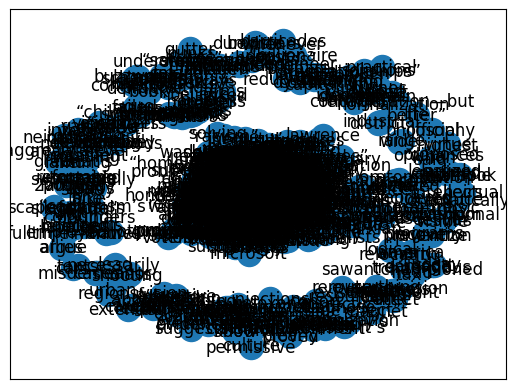

In [27]:
# plotting graph (default layout)
nx.draw_networkx(G_bigram)

I should subset:

In [28]:
#subsetting
bigramsCount_wgte_3=bigramsCount[bigramsCount['weight']>=3]

G_bigram_wgte_3=nx.from_pandas_edgelist(df=bigramsCount_wgte_3, source='word1',target= 'word2',edge_attr= ["weight"])

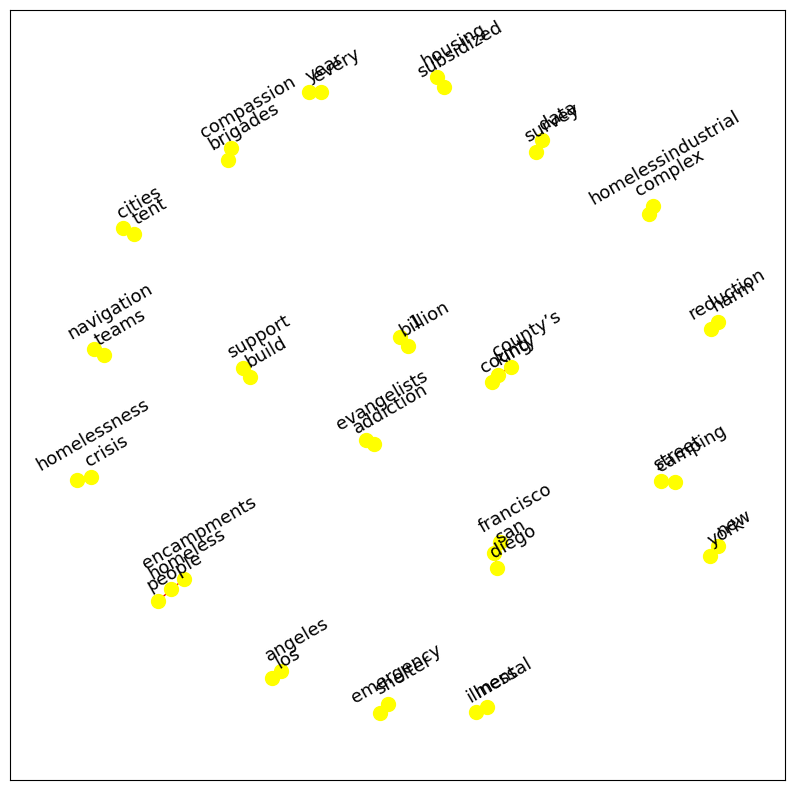

In [29]:

#plotting
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(G_bigram_wgte_3)

# Plot networks
nx.draw_networkx(G_bigram_wgte_3, pos,
                 edge_color='red',node_color='yellow',
                 node_size=100,with_labels = False,ax=ax)

# labels away from node
for word, freq in pos.items():
    x, y = freq[0]+.05, freq[1]+.03
    ax.text(x, y,s=word,horizontalalignment='center',
            fontsize=13,rotation=30)

plt.show()

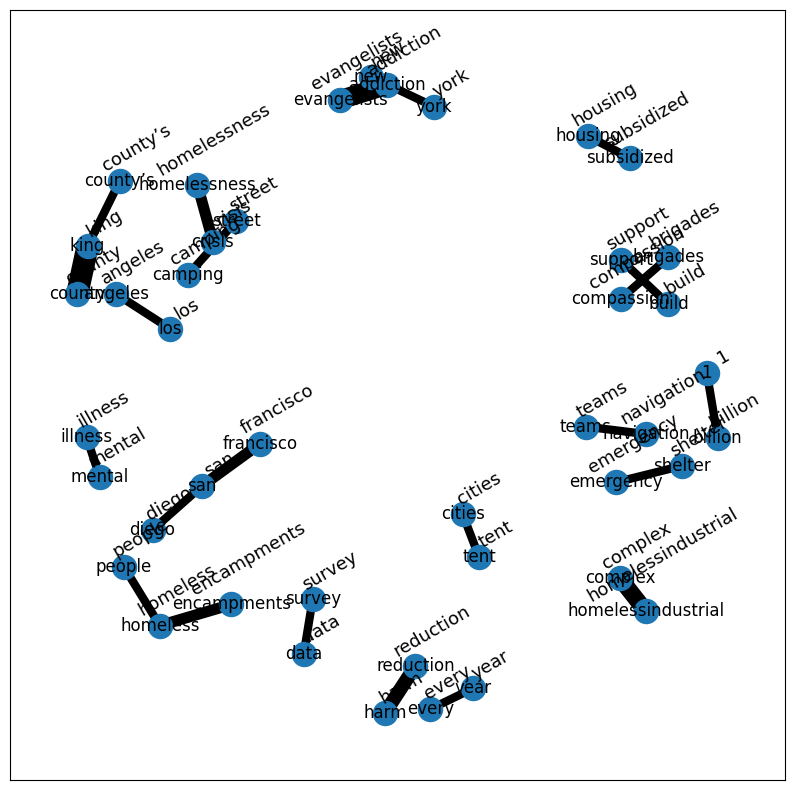

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(G_bigram_wgte_3, weight='weight',k=0.6)
nx.draw_networkx(G_bigram_wgte_3, pos)

# labels away from node
for word, freq in pos.items():
    x, y = freq[0]+.05, freq[1]+.03
    ax.text(x, y,s=word,horizontalalignment='center',
            fontsize=13,rotation=30)

for edge in G_bigram_wgte_3.edges(data='weight'):
    nx.draw_networkx_edges(G_bigram_wgte_3, pos, edgelist=[edge], width=2*edge[2])


<div class="alert-success">

<strong>Exercise</strong>
    
1. Create a GitHub repo.
2. Create a notebook in python, and do a wordcloud with a text in English. Use a file in txt.
3. Create a notebook in python, and do a bigram the previous txt file.
4. Publish the result as a webpage using GitHub
    
</div>

<div class="alert alert-danger">
  <strong>CHALLENGE!</strong>
   <br> * Use the function [n-grams](https://tedboy.github.io/nlps/generated/generated/nltk.ngrams.html) from NLTK, for 3-grams and 4-grams. Use a text in Spanish.
</div>

# Ejercicio con editoriales de El Comercio como data

In [31]:
import os
# Establecer el directorio de trabajo
os.chdir(r'C:\2024 - 1\ASIES\Tarea 4\EC_12abril_2mayo')

In [32]:
# Lista para almacenar el contenido de los archivos
textos = []

# Leer cada archivo de texto en el directorio especificado
for archivo in os.listdir():
    if archivo.endswith('.txt'):
        with open(archivo, 'r', encoding='utf-8') as file:
            textos.append(file.read())

# 'textos' ahora contiene el contenido de cada archivo .txt

In [33]:
textos

['Con las tensiones de segunda vuelta al alza mientras se aproxima el 6 de junio, de uno y otro lado se busca encontrar y ventilar supuestas conspiraciones en contra de la agrupación política de preferencia. Una de las que más ha calado en los últimos días ha sido la acusación al Banco Central de Reserva del Perú (BCRP) de manipulación del tipo de cambio para crear incertidumbre sobre los votantes o para generar ganancias indebidas entre especuladores financieros.\n\nLa excongresista Marisa Glave, cercana a las agrupaciones de izquierda que ha liderado la excandidata presidencial Verónika Mendoza, por ejemplo, señaló esta semana que “no estaría de más que salga información del BCRP sobre la elevación de precio del dólar... para evitar especulaciones (o para confirmarlas)”. Ella es solo una de diversas voces que en los últimos días han puesto en cuestionamiento la labor de la autoridad monetaria en la presente coyuntura.\n\nVale señalar que los recientes movimientos al alza del tipo de 

In [34]:
import numpy as np
import pandas as pd

# Crear un DataFrame a partir de la lista de textos
df_textos = pd.DataFrame(textos, columns=['texto'])

# Utilizar la función de split y luego concatenar usando numpy
seriepalabras = pd.Series(np.concatenate(df_textos['texto'].str.split()))
seriepalabras

0              Con
1              las
2        tensiones
3               de
4          segunda
           ...    
13233         país
13234     necesita
13235       verlos
13236           en
13237      acción.
Length: 13238, dtype: object

In [35]:
# punctuation
import string
PUNCs=string.punctuation # '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
seriepalabras=seriepalabras.str.replace('['+PUNCs+']', '',regex=True)

# all to lower case
seriepalabras=seriepalabras.str.lower()
seriepalabras

0              con
1              las
2        tensiones
3               de
4          segunda
           ...    
13233         país
13234     necesita
13235       verlos
13236           en
13237       acción
Length: 13238, dtype: object

In [36]:
seriepalabras.value_counts()

de          824
la          546
que         514
en          394
el          385
           ... 
arequipa      1
cusco         1
tacna         1
máxima        1
verlos        1
Name: count, Length: 3469, dtype: int64

In [37]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
spanish_stopwords = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
import pandas as pd

# Supongamos que seriepalabras es una serie con todas las palabras de los textos
# y necesitamos filtrar las stopwords
seriepalabras = seriepalabras[~seriepalabras.isin(spanish_stopwords)].reset_index(drop=True)
seriepalabras

0       tensiones
1         segunda
2          vuelta
3            alza
4        mientras
          ...    
6677       gallos
6678         país
6679     necesita
6680       verlos
6681       acción
Length: 6682, dtype: object

In [39]:
seriepalabras.value_counts()

castillo      54
perú          43
ser           33
si            32
libre         30
              ..
producción     1
minera         1
áncash         1
arequipa       1
verlos         1
Name: count, Length: 3317, dtype: int64

In [40]:
EC_12abril_2mayo=seriepalabras.value_counts()[seriepalabras.value_counts()>10]
EC_12abril_2mayo

castillo     54
perú         43
ser          33
si           32
libre        30
             ..
dicho        11
actual       11
electoral    11
señor        11
fin          11
Name: count, Length: 75, dtype: int64

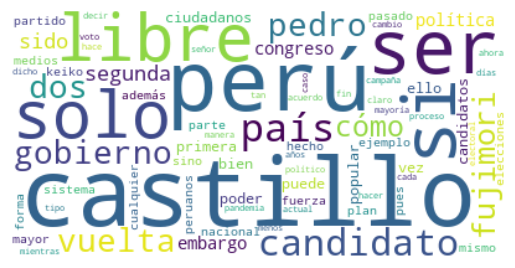

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

EC_wc = WordCloud(background_color='white')
EC_wc.generate_from_frequencies(frequencies=EC_12abril_2mayo.to_dict())
plt.figure()
plt.imshow(EC_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [42]:
df_textos

,texto
0,Con las tensiones de segunda vuelta al alza mi...
1,"Después de idas y venidas, ayer por fin se con..."
2,"En la peor de las condiciones posibles, con un..."
3,"Decir, como se dice estos días, que el resulta..."
4,"Cada vez que se avecina un proceso electoral, ..."
5,El más reciente reporte de la ONPE sobre las a...
6,La prensa ha jugado un papel importantísimo en...
7,Sería un esfuerzo fútil y hasta avezado el int...
8,"Sea quien sea elegido presidente del Perú, Ped..."
9,"Durante el año pasado, la atención del país es..."


In [43]:
type(seriepalabras)

pandas.core.series.Series

In [44]:
type(df_textos)

pandas.core.frame.DataFrame

In [45]:
# Convertir todo el texto en la columna 'texto' a minúsculas
df_textos['texto'] = df_textos['texto'].str.lower()

# Reemplazar los caracteres de puntuación en la columna 'texto'
df_textos['texto'] = df_textos['texto'].str.replace('[' + PUNCs + ']', '', regex=True)

In [46]:
from nltk import bigrams

theBigrams_EC=[bigrams(eachTW.split()) for eachTW in df_textos['texto']]


# list of all bigrams
from itertools import chain

pairWords_EC = list(chain(*theBigrams_EC))

pairWords_EC

[('con', 'las'),
 ('las', 'tensiones'),
 ('tensiones', 'de'),
 ('de', 'segunda'),
 ('segunda', 'vuelta'),
 ('vuelta', 'al'),
 ('al', 'alza'),
 ('alza', 'mientras'),
 ('mientras', 'se'),
 ('se', 'aproxima'),
 ('aproxima', 'el'),
 ('el', '6'),
 ('6', 'de'),
 ('de', 'junio'),
 ('junio', 'de'),
 ('de', 'uno'),
 ('uno', 'y'),
 ('y', 'otro'),
 ('otro', 'lado'),
 ('lado', 'se'),
 ('se', 'busca'),
 ('busca', 'encontrar'),
 ('encontrar', 'y'),
 ('y', 'ventilar'),
 ('ventilar', 'supuestas'),
 ('supuestas', 'conspiraciones'),
 ('conspiraciones', 'en'),
 ('en', 'contra'),
 ('contra', 'de'),
 ('de', 'la'),
 ('la', 'agrupación'),
 ('agrupación', 'política'),
 ('política', 'de'),
 ('de', 'preferencia'),
 ('preferencia', 'una'),
 ('una', 'de'),
 ('de', 'las'),
 ('las', 'que'),
 ('que', 'más'),
 ('más', 'ha'),
 ('ha', 'calado'),
 ('calado', 'en'),
 ('en', 'los'),
 ('los', 'últimos'),
 ('últimos', 'días'),
 ('días', 'ha'),
 ('ha', 'sido'),
 ('sido', 'la'),
 ('la', 'acusación'),
 ('acusación', 'al'),
 ('

In [47]:
pairWords_EC_clean = [gram for gram in pairWords_EC if not any(stop in gram for stop in spanish_stopwords)]
print(pairWords_EC_clean)

[('segunda', 'vuelta'), ('alza', 'mientras'), ('busca', 'encontrar'), ('ventilar', 'supuestas'), ('supuestas', 'conspiraciones'), ('agrupación', 'política'), ('últimos', 'días'), ('banco', 'central'), ('perú', 'bcrp'), ('crear', 'incertidumbre'), ('generar', 'ganancias'), ('ganancias', 'indebidas'), ('especuladores', 'financieros'), ('excongresista', 'marisa'), ('marisa', 'glave'), ('glave', 'cercana'), ('excandidata', 'presidencial'), ('presidencial', 'verónika'), ('verónika', 'mendoza'), ('ejemplo', 'señaló'), ('salga', 'información'), ('evitar', 'especulaciones'), ('diversas', 'voces'), ('últimos', 'días'), ('autoridad', 'monetaria'), ('presente', 'coyuntura'), ('coyuntura', 'vale'), ('vale', 'señalar'), ('recientes', 'movimientos'), ('primera', 'vuelta'), ('moneda', 'peruana'), ('procesos', 'electorales'), ('electorales', 'anteriores'), ('cambio', 'fijo'), ('pésimas', 'consecuencias'), ('bcrp', 'debe'), ('debe', 'intentar'), ('menos', 'marcadas'), ('marcadas', '–es'), ('–es', 'deci

In [48]:
from collections import Counter

bigramsCount_dict_EC = Counter(pairWords_EC_clean) #generate counter

# Turn bigramsCount_dict  into dataframe, naming columns
bigramsCount_EC = pd.DataFrame(bigramsCount_dict_EC.most_common(),
                        columns=['bigrama', 'peso'])
bigramsCount_EC

,bigrama,peso
0,"(perú, libre)",30
1,"(pedro, castillo)",24
2,"(segunda, vuelta)",15
3,"(keiko, fujimori)",13
4,"(fuerza, popular)",13
...,...,...
2204,"(deberían, asegurar)",1
2205,"(encuentros, organizados)",1
2206,"(bravatas, dignas)",1
2207,"(país, necesita)",1


In [49]:
bigramsCount_EC['palabra 1'], bigramsCount_EC['palabra 2'] = zip(*bigramsCount_EC['bigrama'])
bigramsCount_EC

,bigrama,peso,palabra 1,palabra 2
0,"(perú, libre)",30,perú,libre
1,"(pedro, castillo)",24,pedro,castillo
2,"(segunda, vuelta)",15,segunda,vuelta
3,"(keiko, fujimori)",13,keiko,fujimori
4,"(fuerza, popular)",13,fuerza,popular
...,...,...,...,...
2204,"(deberían, asegurar)",1,deberían,asegurar
2205,"(encuentros, organizados)",1,encuentros,organizados
2206,"(bravatas, dignas)",1,bravatas,dignas
2207,"(país, necesita)",1,país,necesita


In [50]:
filtered_bigrams_3 = bigramsCount_EC[bigramsCount_EC['peso'] >= 3]

In [51]:
import networkx as nx
G_bigram_EC_3=nx.from_pandas_edgelist(df=filtered_bigrams_3, source='palabra 1',target= 'palabra 2',edge_attr= ["peso"])

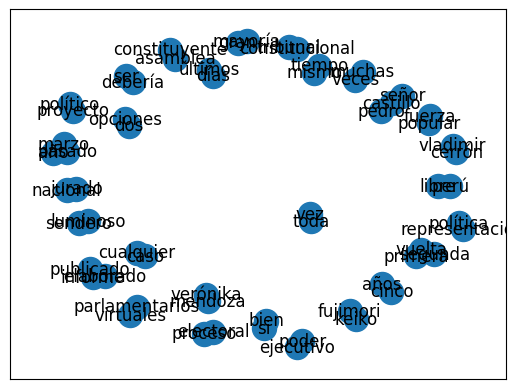

In [52]:
# plotting graph (default layout)
nx.draw_networkx(G_bigram_EC_3)

# Reto: 3-gramas

In [53]:
import pandas as pd
from nltk.util import ngrams

# 'texto' es la columna de texto
the3grams_EC = [list(ngrams(eachTW.split(), 3)) for eachTW in df_textos['texto']]

In [54]:
# list of all bigrams
from itertools import chain

triWords_EC = list(chain(*the3grams_EC))

triWords_EC

[('con', 'las', 'tensiones'),
 ('las', 'tensiones', 'de'),
 ('tensiones', 'de', 'segunda'),
 ('de', 'segunda', 'vuelta'),
 ('segunda', 'vuelta', 'al'),
 ('vuelta', 'al', 'alza'),
 ('al', 'alza', 'mientras'),
 ('alza', 'mientras', 'se'),
 ('mientras', 'se', 'aproxima'),
 ('se', 'aproxima', 'el'),
 ('aproxima', 'el', '6'),
 ('el', '6', 'de'),
 ('6', 'de', 'junio'),
 ('de', 'junio', 'de'),
 ('junio', 'de', 'uno'),
 ('de', 'uno', 'y'),
 ('uno', 'y', 'otro'),
 ('y', 'otro', 'lado'),
 ('otro', 'lado', 'se'),
 ('lado', 'se', 'busca'),
 ('se', 'busca', 'encontrar'),
 ('busca', 'encontrar', 'y'),
 ('encontrar', 'y', 'ventilar'),
 ('y', 'ventilar', 'supuestas'),
 ('ventilar', 'supuestas', 'conspiraciones'),
 ('supuestas', 'conspiraciones', 'en'),
 ('conspiraciones', 'en', 'contra'),
 ('en', 'contra', 'de'),
 ('contra', 'de', 'la'),
 ('de', 'la', 'agrupación'),
 ('la', 'agrupación', 'política'),
 ('agrupación', 'política', 'de'),
 ('política', 'de', 'preferencia'),
 ('de', 'preferencia', 'una'),


In [55]:
triWords_EC_clean = [gram for gram in triWords_EC if not any(stop in gram for stop in spanish_stopwords)]
print(triWords_EC_clean)

[('ventilar', 'supuestas', 'conspiraciones'), ('generar', 'ganancias', 'indebidas'), ('excongresista', 'marisa', 'glave'), ('marisa', 'glave', 'cercana'), ('excandidata', 'presidencial', 'verónika'), ('presidencial', 'verónika', 'mendoza'), ('presente', 'coyuntura', 'vale'), ('coyuntura', 'vale', 'señalar'), ('procesos', 'electorales', 'anteriores'), ('bcrp', 'debe', 'intentar'), ('menos', 'marcadas', '–es'), ('marcadas', '–es', 'decir'), ('–es', 'decir', 'evitar'), ('decir', 'evitar', 'incrementos'), ('contracciones', 'demasiado', 'bruscas'), ('reporte', 'oficial', 'publicado'), ('precio', 'suba', 'menos'), ('entidad', 'pueden', 'evitar'), ('pedro', 'castillo', 'candidato'), ('mercados', 'financieros', 'tan'), ('financieros', 'tan', 'solo'), ('tan', 'solo', 'atenuarlos'), ('dos', 'directores', 'cercanos'), ('fujimorismo', 'rafael', 'rey'), ('josé', 'chlimper', 'hacen'), ('poca', 'solidez', 'aun'), ('solidez', 'aun', 'si'), ('directores', 'quisieran', 'dirigir'), ('queda', 'claro', 'có

In [56]:
from collections import Counter

trigramsCount_dict_EC = Counter(triWords_EC_clean) #generate counter

# Turn bigramsCount_dict  into dataframe, naming columns
trigramsCount_EC = pd.DataFrame(trigramsCount_dict_EC.most_common(),
                        columns=['trigrama', 'peso'])
trigramsCount_EC

,trigrama,peso
0,"(pedro, castillo, candidato)",2
1,"(rafael, lópez, aliaga)",2
2,"(perú, libre, pedro)",2
3,"(libre, pedro, castillo)",2
4,"(keiko, fujimori, fuerza)",2
...,...,...
813,"(fundamental, ver, cómo)",1
814,"(bien, ambos, candidatos)",1
815,"(ambos, candidatos, deberían)",1
816,"(candidatos, deberían, asegurar)",1


In [57]:
trigramsCount_EC['palabra 1'], trigramsCount_EC['palabra 2'], trigramsCount_EC['palabra 3'] = zip(*trigramsCount_EC['trigrama'])
trigramsCount_EC

,trigrama,peso,palabra 1,palabra 2,palabra 3
0,"(pedro, castillo, candidato)",2,pedro,castillo,candidato
1,"(rafael, lópez, aliaga)",2,rafael,lópez,aliaga
2,"(perú, libre, pedro)",2,perú,libre,pedro
3,"(libre, pedro, castillo)",2,libre,pedro,castillo
4,"(keiko, fujimori, fuerza)",2,keiko,fujimori,fuerza
...,...,...,...,...,...
813,"(fundamental, ver, cómo)",1,fundamental,ver,cómo
814,"(bien, ambos, candidatos)",1,bien,ambos,candidatos
815,"(ambos, candidatos, deberían)",1,ambos,candidatos,deberían
816,"(candidatos, deberían, asegurar)",1,candidatos,deberían,asegurar


In [58]:
filtered_trigrams = trigramsCount_EC[trigramsCount_EC['peso'] >= 2]

In [59]:
import pandas as pd
import networkx as nx

# Preparar el DataFrame para NetworkX
edges = pd.concat([
    filtered_trigrams[['palabra 1', 'palabra 2', 'peso']].rename(columns={'palabra 1': 'source', 'palabra 2': 'target'}),
    filtered_trigrams[['palabra 2', 'palabra 3', 'peso']].rename(columns={'palabra 2': 'source', 'palabra 3': 'target'})
])

# Crear el grafo desde el DataFrame de aristas
G_trigram_EC = nx.from_pandas_edgelist(df=edges, source='source', target='target', edge_attr=["peso"])

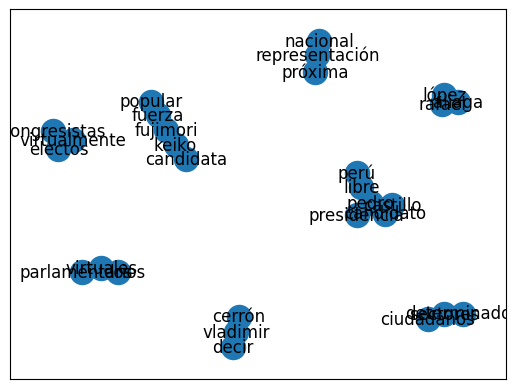

In [60]:
nx.draw_networkx(G_trigram_EC)

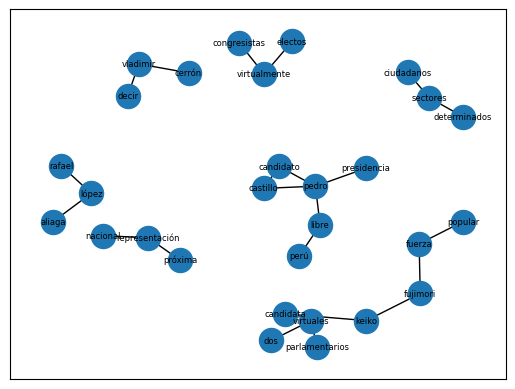

In [82]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G_trigram_EC, k=0.4, iterations=40)  # Ajusta k para cambiar la distancia entre nodos
nx.draw_networkx(G_trigram_EC, pos, font_size=6)
plt.show()

# Reto: 4-gramas

In [83]:
the4grams_EC = [list(ngrams(eachTW.split(), 4)) for eachTW in df_textos['texto']]

In [84]:
tetraWords_EC = list(chain(*the4grams_EC))
tetraWords_EC

[('con', 'las', 'tensiones', 'de'),
 ('las', 'tensiones', 'de', 'segunda'),
 ('tensiones', 'de', 'segunda', 'vuelta'),
 ('de', 'segunda', 'vuelta', 'al'),
 ('segunda', 'vuelta', 'al', 'alza'),
 ('vuelta', 'al', 'alza', 'mientras'),
 ('al', 'alza', 'mientras', 'se'),
 ('alza', 'mientras', 'se', 'aproxima'),
 ('mientras', 'se', 'aproxima', 'el'),
 ('se', 'aproxima', 'el', '6'),
 ('aproxima', 'el', '6', 'de'),
 ('el', '6', 'de', 'junio'),
 ('6', 'de', 'junio', 'de'),
 ('de', 'junio', 'de', 'uno'),
 ('junio', 'de', 'uno', 'y'),
 ('de', 'uno', 'y', 'otro'),
 ('uno', 'y', 'otro', 'lado'),
 ('y', 'otro', 'lado', 'se'),
 ('otro', 'lado', 'se', 'busca'),
 ('lado', 'se', 'busca', 'encontrar'),
 ('se', 'busca', 'encontrar', 'y'),
 ('busca', 'encontrar', 'y', 'ventilar'),
 ('encontrar', 'y', 'ventilar', 'supuestas'),
 ('y', 'ventilar', 'supuestas', 'conspiraciones'),
 ('ventilar', 'supuestas', 'conspiraciones', 'en'),
 ('supuestas', 'conspiraciones', 'en', 'contra'),
 ('conspiraciones', 'en', 'con

In [85]:
tetraWords_EC_clean = [gram for gram in tetraWords_EC if not any(stop in gram for stop in spanish_stopwords)]
print(tetraWords_EC_clean)

[('excongresista', 'marisa', 'glave', 'cercana'), ('excandidata', 'presidencial', 'verónika', 'mendoza'), ('presente', 'coyuntura', 'vale', 'señalar'), ('menos', 'marcadas', '–es', 'decir'), ('marcadas', '–es', 'decir', 'evitar'), ('–es', 'decir', 'evitar', 'incrementos'), ('mercados', 'financieros', 'tan', 'solo'), ('financieros', 'tan', 'solo', 'atenuarlos'), ('poca', 'solidez', 'aun', 'si'), ('queda', 'claro', 'cómo', 'lograrían'), ('técnicos', 'altamente', 'calificados', 'arriesgar'), ('lamentable', 'julio', 'velarde', '–cabeza'), ('keiko', 'fujimori', 'ambos', 'candidatos'), ('primera', 'vuelta', '–con', 'excepción'), ('últimas', 'dos', 'semanas–', 'redujo'), ('castillo', 'ahora', 'si', 'bien'), ('debate', 'pueden', 'ser', 'esperados'), ('encuentro', 'hizo', 'evidente', 'dos'), ('hizo', 'evidente', 'dos', 'cosas'), ('evidente', 'dos', 'cosas', 'primero'), ('cada', 'peruano', 'ambos', 'curiosamente'), ('mesa', '–que', 'ciertamente', 'pudo'), ('–que', 'ciertamente', 'pudo', 'desarro

In [86]:
tetragramsCount_dict_EC = Counter(tetraWords_EC_clean) #generate counter

# Turn bigramsCount_dict  into dataframe, naming columns
tetragramsCount_EC = pd.DataFrame(tetragramsCount_dict_EC.most_common(),
                        columns=['tetragrama', 'peso'])
tetragramsCount_EC

,tetragrama,peso
0,"(perú, libre, pedro, castillo)",2
1,"(keiko, fujimori, fuerza, popular)",2
2,"(excongresista, marisa, glave, cercana)",1
3,"(excandidata, presidencial, verónika, mendoza)",1
4,"(presente, coyuntura, vale, señalar)",1
...,...,...
285,"(declaraciones, puedan, ser, refutadas)",1
286,"(ciudadanos, obtengan, respuestas, especialmente)",1
287,"(propone, derrumbar, instituciones, básicas)",1
288,"(bien, ambos, candidatos, deberían)",1


In [88]:
type(tetragramsCount_EC)

pandas.core.frame.DataFrame

In [87]:
tetragramsCount_EC['palabra 1'], tetragramsCount_EC['palabra 2'], tetragramsCount_EC['palabra 3'], tetragramsCount_EC['palabra 4'] = zip(*tetragramsCount_EC['tetragrama'])
tetragramsCount_EC

,tetragrama,peso,palabra 1,palabra 2,palabra 3,palabra 4
0,"(perú, libre, pedro, castillo)",2,perú,libre,pedro,castillo
1,"(keiko, fujimori, fuerza, popular)",2,keiko,fujimori,fuerza,popular
2,"(excongresista, marisa, glave, cercana)",1,excongresista,marisa,glave,cercana
3,"(excandidata, presidencial, verónika, mendoza)",1,excandidata,presidencial,verónika,mendoza
4,"(presente, coyuntura, vale, señalar)",1,presente,coyuntura,vale,señalar
...,...,...,...,...,...,...
285,"(declaraciones, puedan, ser, refutadas)",1,declaraciones,puedan,ser,refutadas
286,"(ciudadanos, obtengan, respuestas, especialmente)",1,ciudadanos,obtengan,respuestas,especialmente
287,"(propone, derrumbar, instituciones, básicas)",1,propone,derrumbar,instituciones,básicas
288,"(bien, ambos, candidatos, deberían)",1,bien,ambos,candidatos,deberían


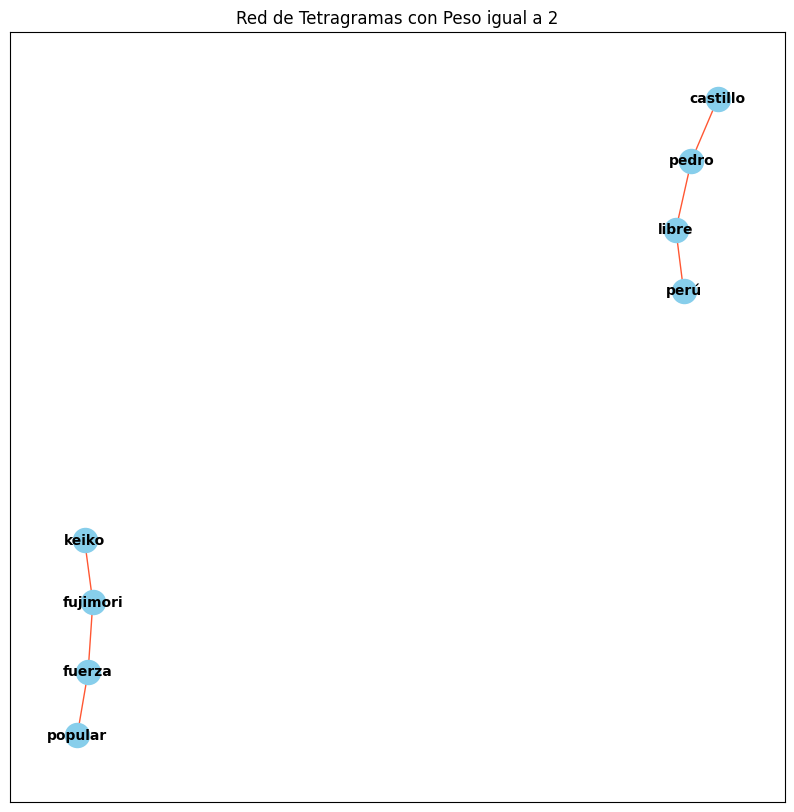

In [90]:
# Supongamos que tetragramsCount_EC tiene las columnas 'palabra 1', 'palabra 2', 'palabra 3', 'palabra 4', 'peso'
# Filtramos los tetragramas por un peso mínimo de 3
filtered_tetragrams = tetragramsCount_EC[tetragramsCount_EC['peso'] == 2]

# Crea un grafo vacío
G_tetragram_EC = nx.Graph()

# Añadir aristas al grafo basadas en cada fila del dataframe filtrado
for idx, row in filtered_tetragrams.iterrows():
    G_tetragram_EC.add_edge(row['palabra 1'], row['palabra 2'], weight=row['peso'])
    G_tetragram_EC.add_edge(row['palabra 2'], row['palabra 3'], weight=row['peso'])
    G_tetragram_EC.add_edge(row['palabra 3'], row['palabra 4'], weight=row['peso'])

# Dibujar el grafo
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
nx.draw_networkx(G_tetragram_EC, with_labels=True, node_color='skyblue', edge_color='#FF5733', font_size=10, font_weight='bold')
plt.title("Red de Tetragramas con Peso igual a 2")
plt.show()

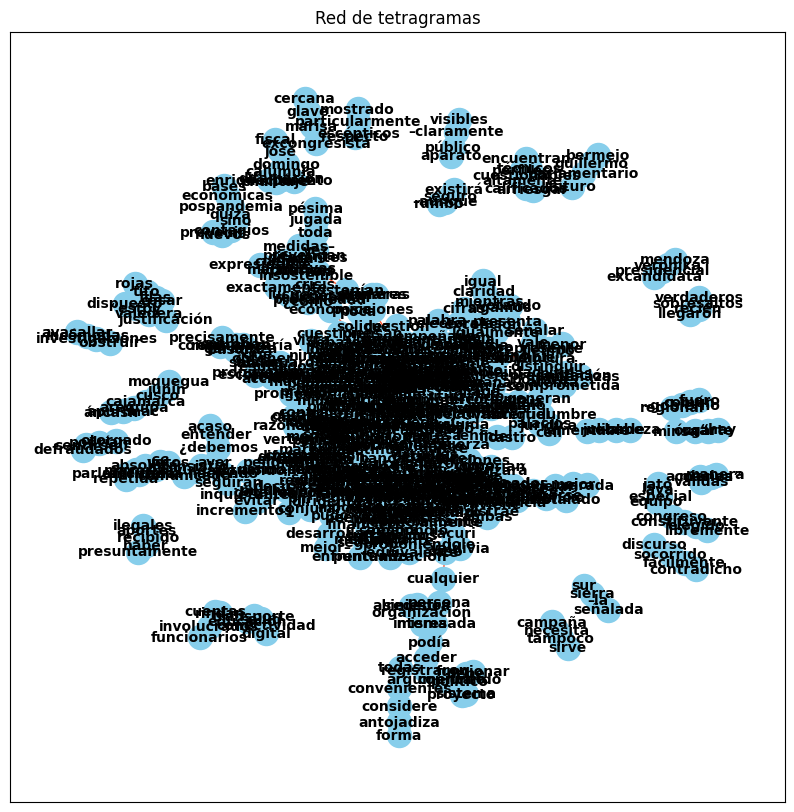

In [92]:
# Creamos un grafo vacío
G_tetragram_EC = nx.Graph()

# Añadir aristas al grafo basadas en cada fila del dataframe filtrado
for idx, row in tetragramsCount_EC.iterrows():
    G_tetragram_EC.add_edge(row['palabra 1'], row['palabra 2'], weight=row['peso'])
    G_tetragram_EC.add_edge(row['palabra 2'], row['palabra 3'], weight=row['peso'])
    G_tetragram_EC.add_edge(row['palabra 3'], row['palabra 4'], weight=row['peso'])

# Dibujar el grafo
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
nx.draw_networkx(G_tetragram_EC, with_labels=True, node_color='skyblue', edge_color='#FF5733', font_size=10, font_weight='bold')
plt.title("Red de tetragramas")
plt.show()